<a href="https://colab.research.google.com/github/VascoBartolo/SP_project/blob/celle/signal_processing_catia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

In our mini-project we decided to try and classify voices as male or female. A dataset of 102 audio recordings was used. Consisting of 51 male and 51 female speakers talking for a short period of time.

#Methodology

We started by loading the dataset and listening to a couple of the recordings. We then read the .wav files and extracted the time domain. We passed this through a filter to filter out all the frequencies that dont belong to the human vocal spectrum. Furthermore, the data was moved to the frequency domain by applying the fourier transform (the fast fourier transform was used for computational reasons). We then proceeded to extract some features GET INTO THE USED FEATURES HERE from each sample and processed these into a dataframe. To conclude, a small amount of modelling techniques where tried in order to lightly asses our performance.

##Data preprocessing

In [212]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import fft
import sklearn
from scipy.io import wavfile
import scipy.io
import os
from scipy import signal
from IPython.display import Audio
import warnings
warnings.filterwarnings("ignore")
     


In [213]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()
gc = gspread.authorize(creds)

Mounted at /content/drive


In [214]:
fem = '/content/drive/MyDrive/signal processing/females/'
mal = '/content/drive/MyDrive/signal processing/males/'

fems = np.array([fem+x for x in os.listdir(fem)])
mals = np.array([mal+x for x in os.listdir(mal)])

creating an array with the filepaths to the different samples for men and women

In [215]:
faudios = np.array([wavfile.read(wav_fname)for wav_fname in fems]) # samplerate (in samples/sec), data
maudios = np.array([wavfile.read(wav_mname)for wav_mname in mals]) # samplerate (in samples/sec), data

converting the waveforms to arrays which can be used to manipulate the data

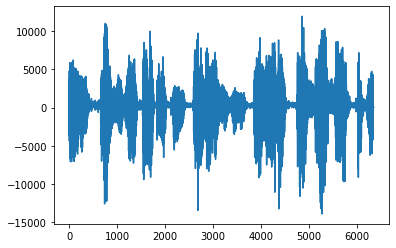

In [216]:
sns.lineplot(data = faudios[0][1][0::10], )

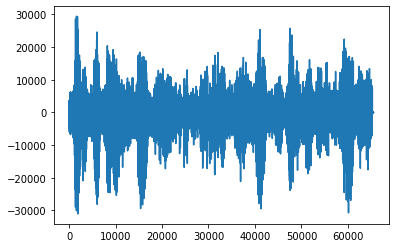

In [217]:
sns.lineplot(data = maudios[0][1])

In [218]:
faudios.shape

(51, 2)

In [219]:
maudios.shape

(51, 2)

2 times 51 files, monochannel

##Filtering data

In [220]:
f_data = []
m_data = []

for i in faudios:
  f_data.append(i[1])

for i in maudios:
  m_data.append(i[1])


Our original sample had a sampling frequency of 16000 samples/sec.

fs = sample frequency.

The voiced speech of a typical adult male will have a fundamental frequency from 85 to 155 Hz, and that of a typical adult female from 165 to 255 Hz.
However, we need to account to harmonics and not only the fundamental frequency.

Because of tis, although speech typically covers frequencies from 30 to 10,000 Hz, most of the energy is in the range from 200 to 3500 Hz (Sobolewski, 2003).

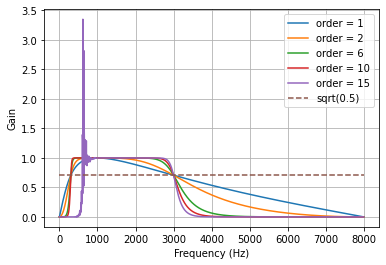

In [221]:
# visualizing the band-pass filter: 

for order in [1, 2, 6, 10, 15]:
  fs = 16000
  h_cut = 3000
  l_cut= 300
  b, a = signal.butter(order, [l_cut, h_cut], 'bandpass', fs=fs)
  w, h = signal.freqz(b, a, worN=2000)
  plt.plot((fs * 0.5 / np.pi) * w, abs(h), label="order = %d" % order)

plt.plot([0, 0.5 * fs], [np.sqrt(0.5), np.sqrt(0.5)],
         '--', label='sqrt(0.5)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain')
plt.grid(True)
plt.legend(loc='best')

plt.show()




A butterworth filter was used to filter out occurring frequencies which dont belong to the human vocal spectrum. 

In [222]:
order = 10
fs = 16000
h_cut = 3500
l_cut= 200

filtered_f=[]
filtered_m = []


for data in f_data:
  sys = signal.butter(order, [l_cut, h_cut], 'bandpass', fs=fs, output='sos')
  y = signal.sosfilt(sys, data)  # compute the output signal
  filtered_f.append(y)

for data in m_data:
  sys = signal.butter(order, [l_cut, h_cut], 'bandpass', fs=fs, output='sos')
  y = signal.sosfilt(sys, data)  # compute the output signal
  filtered_m.append(y)


wn = Audio(y, rate=16000, autoplay=True) ## hear thhe last audio
display(wn)

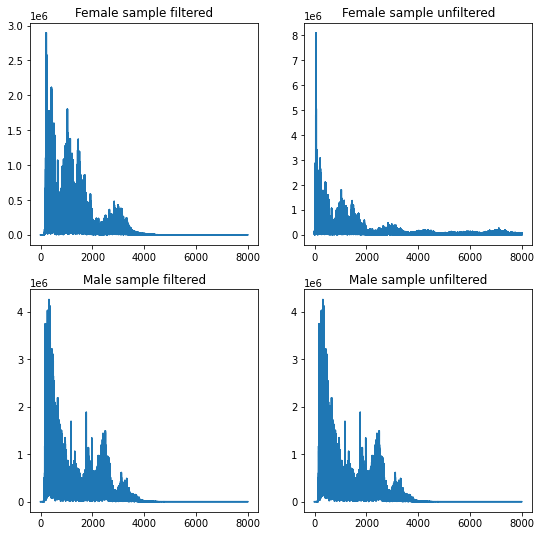

In [270]:
# plotting first and last sample for verification
rand = np.random.randint(0, len(f_data))
y_f1 = filtered_f[rand]
y_f2 = f_data[rand]
y_m1 = filtered_m[rand]
y_m2 = m_data[rand]

yf1 = fft.fft(y_f1)
yf2 = fft.fft(y_f2)
ym1 = fft.fft(y_m1)
ym2 = fft.fft(y_m2)

xf1 = fft.fftfreq(len(yf1), 1 / fs)
xf2 = fft.fftfreq(len(yf2), 1 / fs)
xm1 = fft.fftfreq(len(ym1), 1 / fs)
xm2 = fft.fftfreq(len(ym2), 1 / fs)

plt.figure(figsize=(9, 9))
plt.subplot(2, 2, 1)
plt.plot(abs(xf1), np.abs(yf1))
plt.title('Female sample filtered')
plt.subplot(2, 2, 2)
plt.plot(abs(xf2), np.abs(yf2))
plt.title('Female sample unfiltered')
plt.subplot(2, 2, 3)
plt.plot(abs(xm1), np.abs(ym1))
plt.title('Male sample filtered')
plt.subplot(2, 2, 4)
plt.plot(abs(xm1), np.abs(ym1))
plt.title('Male sample unfiltered')


plt.show()

Quick visualisation in order to compare filtered and unfiltered frequencies for men and women

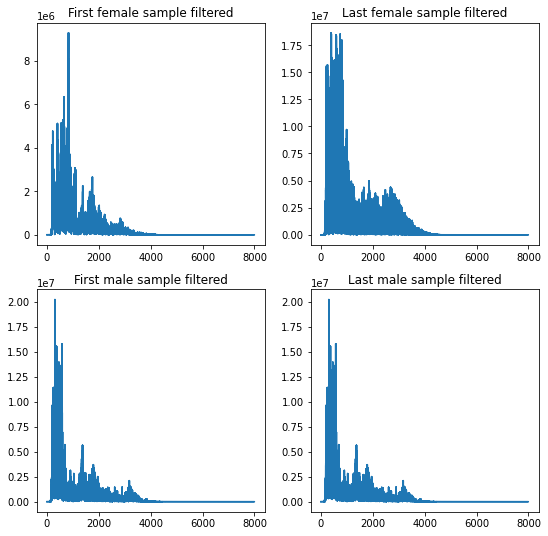

In [271]:
# plotting first and last sample for verification

y_f1 = filtered_f[0]
y_f2 = filtered_f[-1]
y_m1 = filtered_m[0]
y_m2 = filtered_m[-1]

yf1 = fft.fft(y_f1)
yf2 = fft.fft(y_f2)
ym1 = fft.fft(y_m1)
ym2 = fft.fft(y_m2)

xf1 = fft.fftfreq(len(yf1), 1 / fs)
xf2 = fft.fftfreq(len(yf2), 1 / fs)
xm1 = fft.fftfreq(len(ym1), 1 / fs)
xm2 = fft.fftfreq(len(ym2), 1 / fs)

plt.figure(figsize=(9, 9))
plt.subplot(2, 2, 1)
plt.plot(abs(xf1), np.abs(yf1))
plt.title('First female sample filtered')
plt.subplot(2, 2, 2)
plt.plot(abs(xf2), np.abs(yf2))
plt.title('Last female sample filtered')
plt.subplot(2, 2, 3)
plt.plot(abs(xm1), np.abs(ym1))
plt.title('First male sample filtered')
plt.subplot(2, 2, 4)
plt.plot(abs(xm1), np.abs(ym1))
plt.title('Last male sample filtered')


plt.show()

##Extract features

In [231]:
import scipy.stats as stats

FEATURES = ['MIN','MAX','MEAN','RMS','VAR','STD','POWER','PEAK','SKEW', 'KURTOSIS','P2P','CREST_FACTOR', 'FORM_FACTOR', 'PULSE_INDICATOR','MAX_f','SUM_f','MEAN_f','VAR_f','PEAK_f','SKEW_f','KURTOSIS_f']

def features_extraction(df):

    df_features_list = []

    for i in range(len(df)):
      X = df[i]
      df_features = []
      
      Min=[];Max=[];Mean=[];Rms=[];Var=[];Std=[];Power=[];Peak=[];Skew=[];Kurtosis=[];P2p=[];CrestFactor=[];
      FormFactor=[]; PulseIndicator=[];
      Max_f=[];Sum_f=[];Mean_f=[];Var_f=[];Peak_f=[];Skew_f=[];Kurtosis_f=[]
      
      ## TIME DOMAIN ##

      df_features.append(np.min(X))
      df_features.append(np.max(X))
      df_features.append(np.mean(X))
      df_features.append(np.sqrt(np.mean(X**2)))
      df_features.append(np.var(X))
      df_features.append(np.std(X))
      df_features.append(np.mean(X**2))
      df_features.append(np.max(np.abs(X)))
      df_features.append(np.ptp(X))
      df_features.append(np.max(np.abs(X))/np.sqrt(np.mean(X**2)))
      df_features.append(stats.skew(X))
      df_features.append(stats.kurtosis(X))
      df_features.append(np.sqrt(np.mean(X**2))/np.mean(X))
      df_features.append(np.max(np.abs(X))/np.mean(X))

      ## FREQ DOMAIN ##
      ft = fft.fft(X)
      S = np.abs(ft**2)/len(X)
      df_features.append(np.max(S))
      df_features.append(np.sum(S))
      df_features.append(np.mean(S))
      df_features.append(np.var(S))
      
      df_features.append(np.max(np.abs(S)))
      df_features.append(stats.skew(X))
      df_features.append(stats.kurtosis(X))
      #Create dataframe from features
      df_features_list.append(df_features)
    return df_features_list

TALK ABOUT USED FEATURES HERE

###Extract features from female audio

In [233]:
features = features_extraction(filtered_f)
features_list = np.array(features)
df_features_f = pd.DataFrame(columns = [FEATURES], data = features_list)
df_features_f

MIN           MAX          MEAN          RMS           VAR  \
0  -15309.882891  16372.554562  8.275154e-02  2771.917030  7.683524e+06   
1  -15751.048143  18285.041445  2.611572e-05  3044.778922  9.270679e+06   
2  -22516.010158  25040.848392  1.334058e-02  5776.555669  3.336860e+07   
3   -5566.298991   4491.894498 -9.869092e-07   682.300284  4.655337e+05   
4  -12408.045042  12231.221502 -4.993330e-05   675.071108  4.557210e+05   
5  -14334.222427  10287.489096 -7.593479e-03  1283.863104  1.648304e+06   
6  -16736.198126  11330.171795  1.423662e-03  1851.297694  3.427303e+06   
7   -1729.969231   1963.979221  1.410734e-02   515.272517  2.655058e+05   
8  -12781.859406  10509.667094 -4.567346e-04  1683.298679  2.833494e+06   
9  -11558.972320  10633.537438 -8.207982e-05  1241.134017  1.540414e+06   
10  -2230.037884   2371.014646  7.934040e-06   433.655593  1.880572e+05   
11 -25540.978429  30693.607529 -5.276594e-04  2441.473007  5.960790e+06   
12 -38581.277644  39809.937088 -5.070018e-02  6362.533759  4.048184e+07   
13  -8808.718392   6877.475828 -1.693796e-05  1110.297918  1.232761e+06   
14  -5034.810473   5133.613474 -8.956795e-07   971.907255  9.446037e+05   
15 -16876.769725  12391.085658 -3.109318e-05  1553.149223  2.412273e+06   
16 -14983.105823  13462.511733  8.526043e-05  2299.830659  5.289221e+06   
17 -27068.288388  22278.434371 -2.172350e-03  4774.178443  2.279278e+07   
18 -16312.213311  11866.526153  3.432001e-02  1683.855459  2.835369e+06   
19 -12593.941706  11125.094631 -3.584282e-05  1536.302545  2.360226e+06   
20  -4842.398163   5562.362300  4.534696e-04   591.097027  3.493957e+05   
21 -35116.475407  27066.928018  8.070807e-03  4192.139203  1.757403e+07   
22  -7175.827966   7214.764973 -3.243651e-03   585.004530  3.422303e+05   
23 -17149.310873  18114.755079  1.054657e-03  3129.039770  9.790890e+06   
24  -5866.657459   6466.583361  1.467617e-05  1063.630774  1.131310e+06   
25 -10237.774602   8769.227549 -1.235770e-03  1421.640775  2.021062e+06   
26 -29172.622071  29889.822388 -7.928848e-03  6248.368293  3.904211e+07   
27 -25072.793287  24305.778146 -3.950909e-06  2050.507763  4.204582e+06   
28  -6862.592812   8177.988526  5.045172e-06   938.447906  8.806845e+05   
29 -13957.673925  14765.647245 -3.250756e-08  2672.501957  7.142267e+06   
30 -28210.878870  26620.778009  9.139015e-05  2015.467138  4.062108e+06   
31  -6999.539651   6698.648747 -4.090688e-03   799.817090  6.397074e+05   
32 -36355.675946  34158.156715  1.518969e-06  6482.894397  4.202792e+07   
33 -20373.333409  15709.087230  4.543375e-05  2615.805532  6.842439e+06   
34  -6521.704680   7002.066885 -1.823010e-02  1320.110875  1.742693e+06   
35 -32854.597690  29281.589793  1.102909e-05  6743.914408  4.548038e+07   
36 -17346.480953  16477.873036  7.382165e-07  1660.524990  2.757343e+06   
37 -10449.650803  11315.916048 -3.289384e-07  1034.546441  1.070286e+06   
38 -14252.237858  13491.979166 -2.213398e-06  2001.605799  4.006426e+06   
39 -15632.481630  17951.618577  1.421343e-03  1636.488614  2.678095e+06   
40  -7344.519039   7897.425964  2.390038e-05   947.053563  8.969105e+05   
41 -29891.673125  34205.848820  2.505874e-04  5005.516033  2.505519e+07   
42 -23293.168206  16447.742148 -4.597608e-07  2080.353170  4.327869e+06   
43 -23701.208514  21523.665720 -5.096597e-03  4238.013500  1.796076e+07   
44 -12851.910362  16599.048179  3.835905e-05  2565.189563  6.580197e+06   
45 -11565.153607  12102.931275 -2.958702e-05  1908.059847  3.640692e+06   
46 -34475.119951  29605.225272 -5.697748e-01  6009.634329  3.611570e+07   
47 -12553.096314  11843.329197 -4.128241e-04  1894.761266  3.590120e+06   
48 -10842.991125  11110.507465 -1.442709e-06  1765.089319  3.115540e+06   
49 -18521.453144  16685.679377  2.285407e-04  1752.279043  3.070482e+06   
50 -24868.257925  24347.481092  1.021668e-03  2812.457952  7.909920e+06   

            STD         POWER          PEAK          SKEW   KURTOSIS  ...  \
0   2771.917029  7.683524e+06  1637

In [234]:
import librosa
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from scipy.signal import find_peaks

In [77]:
def get_pitch(data_list, sampling_frequency):

  pitch_df = []
  for data in data_list:
    
    # Get some useful statistics
    T = 1/sampling_frequency # Sampling period
    N = len(data) # Signal length in samples
    t = N / sampling_frequency # Signal length in seconds
    Y_k = np.fft.fft(data)[0:int(N/2)]/N # FFT
    Y_k[1:] = 2*Y_k[1:] # Single-sided spectrum
    Pxx = np.abs(Y_k) # Power spectrum

    f = sampling_frequency * np.arange((N/2)) / N; # frequencies
    auto = sm.tsa.acf(data, nlags=2000)
    peaks = find_peaks(auto)[0] # Find peaks of the autocorrelation
    lag = peaks[0] # Choose the first peak as our pitch component lag
    pitch = sampling_frequency / lag # Transform lag into frequency
    pitch_df.append(pitch)

  return pitch_df

In [78]:
result_f = get_pitch(filtered_f, fs)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


In [235]:
label_fem = [1] * len(df_features_f)
df_features_f.insert(21, "Pitch", result_f, True)
df_features_f.insert(22, "Label", label_fem, True)
df_features_f

MIN           MAX          MEAN          RMS           VAR  \
0  -15309.882891  16372.554562  8.275154e-02  2771.917030  7.683524e+06   
1  -15751.048143  18285.041445  2.611572e-05  3044.778922  9.270679e+06   
2  -22516.010158  25040.848392  1.334058e-02  5776.555669  3.336860e+07   
3   -5566.298991   4491.894498 -9.869092e-07   682.300284  4.655337e+05   
4  -12408.045042  12231.221502 -4.993330e-05   675.071108  4.557210e+05   
5  -14334.222427  10287.489096 -7.593479e-03  1283.863104  1.648304e+06   
6  -16736.198126  11330.171795  1.423662e-03  1851.297694  3.427303e+06   
7   -1729.969231   1963.979221  1.410734e-02   515.272517  2.655058e+05   
8  -12781.859406  10509.667094 -4.567346e-04  1683.298679  2.833494e+06   
9  -11558.972320  10633.537438 -8.207982e-05  1241.134017  1.540414e+06   
10  -2230.037884   2371.014646  7.934040e-06   433.655593  1.880572e+05   
11 -25540.978429  30693.607529 -5.276594e-04  2441.473007  5.960790e+06   
12 -38581.277644  39809.937088 -5.070018e-02  6362.533759  4.048184e+07   
13  -8808.718392   6877.475828 -1.693796e-05  1110.297918  1.232761e+06   
14  -5034.810473   5133.613474 -8.956795e-07   971.907255  9.446037e+05   
15 -16876.769725  12391.085658 -3.109318e-05  1553.149223  2.412273e+06   
16 -14983.105823  13462.511733  8.526043e-05  2299.830659  5.289221e+06   
17 -27068.288388  22278.434371 -2.172350e-03  4774.178443  2.279278e+07   
18 -16312.213311  11866.526153  3.432001e-02  1683.855459  2.835369e+06   
19 -12593.941706  11125.094631 -3.584282e-05  1536.302545  2.360226e+06   
20  -4842.398163   5562.362300  4.534696e-04   591.097027  3.493957e+05   
21 -35116.475407  27066.928018  8.070807e-03  4192.139203  1.757403e+07   
22  -7175.827966   7214.764973 -3.243651e-03   585.004530  3.422303e+05   
23 -17149.310873  18114.755079  1.054657e-03  3129.039770  9.790890e+06   
24  -5866.657459   6466.583361  1.467617e-05  1063.630774  1.131310e+06   
25 -10237.774602   8769.227549 -1.235770e-03  1421.640775  2.021062e+06   
26 -29172.622071  29889.822388 -7.928848e-03  6248.368293  3.904211e+07   
27 -25072.793287  24305.778146 -3.950909e-06  2050.507763  4.204582e+06   
28  -6862.592812   8177.988526  5.045172e-06   938.447906  8.806845e+05   
29 -13957.673925  14765.647245 -3.250756e-08  2672.501957  7.142267e+06   
30 -28210.878870  26620.778009  9.139015e-05  2015.467138  4.062108e+06   
31  -6999.539651   6698.648747 -4.090688e-03   799.817090  6.397074e+05   
32 -36355.675946  34158.156715  1.518969e-06  6482.894397  4.202792e+07   
33 -20373.333409  15709.087230  4.543375e-05  2615.805532  6.842439e+06   
34  -6521.704680   7002.066885 -1.823010e-02  1320.110875  1.742693e+06   
35 -32854.597690  29281.589793  1.102909e-05  6743.914408  4.548038e+07   
36 -17346.480953  16477.873036  7.382165e-07  1660.524990  2.757343e+06   
37 -10449.650803  11315.916048 -3.289384e-07  1034.546441  1.070286e+06   
38 -14252.237858  13491.979166 -2.213398e-06  2001.605799  4.006426e+06   
39 -15632.481630  17951.618577  1.421343e-03  1636.488614  2.678095e+06   
40  -7344.519039   7897.425964  2.390038e-05   947.053563  8.969105e+05   
41 -29891.673125  34205.848820  2.505874e-04  5005.516033  2.505519e+07   
42 -23293.168206  16447.742148 -4.597608e-07  2080.353170  4.327869e+06   
43 -23701.208514  21523.665720 -5.096597e-03  4238.013500  1.796076e+07   
44 -12851.910362  16599.048179  3.835905e-05  2565.189563  6.580197e+06   
45 -11565.153607  12102.931275 -2.958702e-05  1908.059847  3.640692e+06   
46 -34475.119951  29605.225272 -5.697748e-01  6009.634329  3.611570e+07   
47 -12553.096314  11843.329197 -4.128241e-04  1894.761266  3.590120e+06   
48 -10842.991125  11110.507465 -1.442709e-06  1765.089319  3.115540e+06   
49 -18521.453144  16685.679377  2.285407e-04  1752.279043  3.070482e+06   
50 -24868.257925  24347.481092  1.021668e-03  2812.457952  7.909920e+06   

            STD         POWER          PEAK          SKEW   KURTOSIS  ...  \
0   2771.917029  7.683524e+06  1637

###Extracting features from male audio

In [236]:
features = features_extraction(filtered_m)
features_list = np.array(features)
df_features_m = pd.DataFrame(columns = [FEATURES], data = features_list)
df_features_m

MIN           MAX          MEAN          RMS           VAR  \
0  -32154.132909  34395.837540  4.380265e-02  5034.686205  2.534807e+07   
1  -28484.752177  30943.420605  1.970472e-03  4824.897973  2.327964e+07   
2   -3374.757764   3358.060819 -1.659962e-06   589.515198  3.475282e+05   
3  -28625.822604  35411.777087 -4.835408e-05  5955.815812  3.547174e+07   
4   -8896.781681  10359.995192  5.353319e-05  1487.823246  2.213618e+06   
5  -23598.695034  25106.647023 -1.016236e-03  4344.840147  1.887764e+07   
6   -9705.953049  10259.403737 -3.524591e-04  1042.157003  1.086091e+06   
7  -37814.480350  44143.041513 -2.973428e-04  7935.827193  6.297735e+07   
8   -8201.046297  10664.802965 -3.492636e-02  1250.170175  1.562925e+06   
9   -5756.039635   5458.350419  5.054349e-03  1161.987930  1.350216e+06   
10  -6170.465932   6220.983267 -1.862130e-06   882.160108  7.782065e+05   
11 -18952.009186  19162.306592  1.862214e-03  2253.567960  5.078569e+06   
12  -8126.847174  10585.246270  1.324682e-04  1107.599548  1.226777e+06   
13 -20309.093841  18947.491214  1.069198e-04  5037.505765  2.537646e+07   
14  -2890.619562   3246.375380  2.550640e-05   368.042042  1.354549e+05   
15 -28068.659048  29610.497373 -8.120239e-06  5054.226705  2.554521e+07   
16  -1429.445732   1547.703953  4.843858e-08   174.803207  3.055616e+04   
17  -5334.721118   5303.906683 -3.970327e-05   615.736418  3.791313e+05   
18 -13107.170826  13842.107856 -2.991936e-05  1339.188669  1.793426e+06   
19  -9319.662558   9395.062435 -7.952761e-06  1051.976135  1.106654e+06   
20 -13492.630054  14217.495553  3.067378e-07  1455.776256  2.119285e+06   
21 -29469.063313  22950.158347 -2.120139e-05  4272.116916  1.825098e+07   
22  -7360.979037   7202.040256  9.570043e-07  1285.583248  1.652724e+06   
23  -4282.947687   5149.300220 -4.918066e-03   584.293279  3.413986e+05   
24 -23908.725144  21512.114456  1.187599e-04  3637.342983  1.323026e+07   
25  -5640.617374   7476.953278  7.537178e-05   934.918679  8.740729e+05   
26  -7133.457196   7116.671241  6.434125e-04   901.160827  8.120908e+05   
27 -27506.895362  28079.767760 -9.931461e-02  6119.763074  3.745150e+07   
28  -5073.870005   5185.754195  3.005647e-03   892.897204  7.972654e+05   
29  -9344.854515   9470.565718 -5.382780e-07  1231.041181  1.515462e+06   
30  -8873.137409   7469.024186 -2.728833e-06  1108.994498  1.229869e+06   
31  -9176.924093  10441.660816  2.287302e-06  1610.628461  2.594124e+06   
32  -3261.634463   3178.016428  1.675641e-06   425.077931  1.806912e+05   
33 -12321.671625  11473.641109  1.967921e-05  1494.442846  2.233359e+06   
34 -18483.140342  16443.789724 -1.613150e-07  2131.390600  4.542826e+06   
35  -9350.002577   9223.589460 -2.191847e-02  1741.079994  3.031360e+06   
36  -7190.964206   7556.390599 -3.544070e-05  1321.926047  1.747488e+06   
37 -27963.376834  20962.352335  1.211254e-05  2422.190261  5.867006e+06   
38 -12618.120943  10420.997740 -4.837761e-06   849.212117  7.211612e+05   
39  -8845.572123   9416.350091  5.679713e-06   898.976845  8.081594e+05   
40 -11247.362608   8934.291923  7.299648e-06  1303.778622  1.699839e+06   
41  -7123.658837   7028.759850 -1.972104e-03  1243.948191  1.547407e+06   
42  -7924.163587  10010.356192  2.270831e-05  1543.582555  2.382647e+06   
43 -34234.326369  41740.071944 -3.929799e-02  4454.929553  1.984640e+07   
44 -14979.054149  15158.185894 -4.441716e-06  1605.936556  2.579032e+06   
45  -5426.070020   5664.279534  4.677081e-07   736.193929  5.419815e+05   
46  -9348.319512  10018.899208 -8.197055e-04  1508.189275  2.274635e+06   
47  -5405.086114   5089.582036  1.327184e-07   605.735826  3.669159e+05   
48  -6371.981905   6753.554075 -2.489452e-06  1116.198531  1.245899e+06   
49 -40812.687201  40947.176233  4.666826e-06  6445.686155  4.154687e+07   
50 -11393.940267  10391.284697 -3.225148e-02  2914.073045  8.491822e+06   

            STD         POWER          PEAK          SKEW   KURTOSIS  ...  \
0   5034.686204  2.534807e+07  3439

In [81]:
result_m = get_pitch(filtered_m, fs)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


In [237]:
label_mal = [0] * len(df_features_m)
df_features_m.insert(21, "Pitch", result_m, True)
df_features_m.insert(22, "Label", label_mal, True)
df_features_m

MIN           MAX          MEAN          RMS           VAR  \
0  -32154.132909  34395.837540  4.380265e-02  5034.686205  2.534807e+07   
1  -28484.752177  30943.420605  1.970472e-03  4824.897973  2.327964e+07   
2   -3374.757764   3358.060819 -1.659962e-06   589.515198  3.475282e+05   
3  -28625.822604  35411.777087 -4.835408e-05  5955.815812  3.547174e+07   
4   -8896.781681  10359.995192  5.353319e-05  1487.823246  2.213618e+06   
5  -23598.695034  25106.647023 -1.016236e-03  4344.840147  1.887764e+07   
6   -9705.953049  10259.403737 -3.524591e-04  1042.157003  1.086091e+06   
7  -37814.480350  44143.041513 -2.973428e-04  7935.827193  6.297735e+07   
8   -8201.046297  10664.802965 -3.492636e-02  1250.170175  1.562925e+06   
9   -5756.039635   5458.350419  5.054349e-03  1161.987930  1.350216e+06   
10  -6170.465932   6220.983267 -1.862130e-06   882.160108  7.782065e+05   
11 -18952.009186  19162.306592  1.862214e-03  2253.567960  5.078569e+06   
12  -8126.847174  10585.246270  1.324682e-04  1107.599548  1.226777e+06   
13 -20309.093841  18947.491214  1.069198e-04  5037.505765  2.537646e+07   
14  -2890.619562   3246.375380  2.550640e-05   368.042042  1.354549e+05   
15 -28068.659048  29610.497373 -8.120239e-06  5054.226705  2.554521e+07   
16  -1429.445732   1547.703953  4.843858e-08   174.803207  3.055616e+04   
17  -5334.721118   5303.906683 -3.970327e-05   615.736418  3.791313e+05   
18 -13107.170826  13842.107856 -2.991936e-05  1339.188669  1.793426e+06   
19  -9319.662558   9395.062435 -7.952761e-06  1051.976135  1.106654e+06   
20 -13492.630054  14217.495553  3.067378e-07  1455.776256  2.119285e+06   
21 -29469.063313  22950.158347 -2.120139e-05  4272.116916  1.825098e+07   
22  -7360.979037   7202.040256  9.570043e-07  1285.583248  1.652724e+06   
23  -4282.947687   5149.300220 -4.918066e-03   584.293279  3.413986e+05   
24 -23908.725144  21512.114456  1.187599e-04  3637.342983  1.323026e+07   
25  -5640.617374   7476.953278  7.537178e-05   934.918679  8.740729e+05   
26  -7133.457196   7116.671241  6.434125e-04   901.160827  8.120908e+05   
27 -27506.895362  28079.767760 -9.931461e-02  6119.763074  3.745150e+07   
28  -5073.870005   5185.754195  3.005647e-03   892.897204  7.972654e+05   
29  -9344.854515   9470.565718 -5.382780e-07  1231.041181  1.515462e+06   
30  -8873.137409   7469.024186 -2.728833e-06  1108.994498  1.229869e+06   
31  -9176.924093  10441.660816  2.287302e-06  1610.628461  2.594124e+06   
32  -3261.634463   3178.016428  1.675641e-06   425.077931  1.806912e+05   
33 -12321.671625  11473.641109  1.967921e-05  1494.442846  2.233359e+06   
34 -18483.140342  16443.789724 -1.613150e-07  2131.390600  4.542826e+06   
35  -9350.002577   9223.589460 -2.191847e-02  1741.079994  3.031360e+06   
36  -7190.964206   7556.390599 -3.544070e-05  1321.926047  1.747488e+06   
37 -27963.376834  20962.352335  1.211254e-05  2422.190261  5.867006e+06   
38 -12618.120943  10420.997740 -4.837761e-06   849.212117  7.211612e+05   
39  -8845.572123   9416.350091  5.679713e-06   898.976845  8.081594e+05   
40 -11247.362608   8934.291923  7.299648e-06  1303.778622  1.699839e+06   
41  -7123.658837   7028.759850 -1.972104e-03  1243.948191  1.547407e+06   
42  -7924.163587  10010.356192  2.270831e-05  1543.582555  2.382647e+06   
43 -34234.326369  41740.071944 -3.929799e-02  4454.929553  1.984640e+07   
44 -14979.054149  15158.185894 -4.441716e-06  1605.936556  2.579032e+06   
45  -5426.070020   5664.279534  4.677081e-07   736.193929  5.419815e+05   
46  -9348.319512  10018.899208 -8.197055e-04  1508.189275  2.274635e+06   
47  -5405.086114   5089.582036  1.327184e-07   605.735826  3.669159e+05   
48  -6371.981905   6753.554075 -2.489452e-06  1116.198531  1.245899e+06   
49 -40812.687201  40947.176233  4.666826e-06  6445.686155  4.154687e+07   
50 -11393.940267  10391.284697 -3.225148e-02  2914.073045  8.491822e+06   

            STD         POWER          PEAK          SKEW   KURTOSIS  ...  \
0   5034.686204  2.534807e+07  3439

###Merging both female and male feature dfs

In [238]:
df_features = df_features_f.append(df_features_m)
df_features 

MIN           MAX          MEAN          RMS           VAR  \
0  -15309.882891  16372.554562  8.275154e-02  2771.917030  7.683524e+06   
1  -15751.048143  18285.041445  2.611572e-05  3044.778922  9.270679e+06   
2  -22516.010158  25040.848392  1.334058e-02  5776.555669  3.336860e+07   
3   -5566.298991   4491.894498 -9.869092e-07   682.300284  4.655337e+05   
4  -12408.045042  12231.221502 -4.993330e-05   675.071108  4.557210e+05   
..           ...           ...           ...          ...           ...   
46  -9348.319512  10018.899208 -8.197055e-04  1508.189275  2.274635e+06   
47  -5405.086114   5089.582036  1.327184e-07   605.735826  3.669159e+05   
48  -6371.981905   6753.554075 -2.489452e-06  1116.198531  1.245899e+06   
49 -40812.687201  40947.176233  4.666826e-06  6445.686155  4.154687e+07   
50 -11393.940267  10391.284697 -3.225148e-02  2914.073045  8.491822e+06   

            STD         POWER          PEAK          SKEW   KURTOSIS  ...  \
0   2771.917029  7.683524e+06  16372.554562  31682.437453   5.906582  ...   
1   3044.778922  9.270679e+06  18285.041445  34036.089589   6.005376  ...   
2   5776.555669  3.336860e+07  25040.848392  47556.858550   4.334910  ...   
3    682.300284  4.655337e+05   5566.298991  10058.193490   8.158137  ...   
4    675.071108  4.557210e+05  12408.045042  24639.266544  18.380353  ...   
..          ...           ...           ...           ...        ...  ...   
46  1508.189275  2.274635e+06  10018.899208  19367.218720   6.642999  ...   
47   605.735826  3.669159e+05   5405.086114  10494.668151   8.923174  ...   
48  1116.198531  1.245899e+06   6753.554075  13125.535980   6.050495  ...   
49  6445.686155  4.154687e+07  40947.176233  81759.863434   6.352648  ...   
50  2914.073045  8.491822e+06  11393.940267  21785.224964   3.909971  ...   

   PULSE_INDICATOR         MAX_f         SUM_f        MEAN_f         VAR_f  \
0     1.978520e+05  1.356501e+09  4.878116e+11  7.683524e+06  1.232107e+15   
1     7.001546e+08  1.330528e+09  6.835086e+11  9.270679e+06  1.620299e+15   
2     1.877043e+06  5.063673e+09  2.186844e+12  3.336860e+07  3.857502e+16   
3    -5.640133e+09  1.696637e+08  3.527628e+10  4.655337e+05  1.204102e+13   
4    -2.484924e+08  4.717127e+07  7.979857e+10  4.557210e+05  2.938268e+12   
..             ...           ...           ...           ...           ...   
46   -1.222256e+07  3.258452e+08  2.399103e+11  2.274635e+06  1.422406e+14   
47    4.072596e+10  8.591514e+07  3.231208e+10  3.669159e+05  4.402457e+12   
48   -2.712867e+09  4.832389e+08  8.547865e+10  1.245899e+06  6.768052e+13   
49    8.774096e+09  7.079320e+09  4.126768e+12  4.154687e+07  3.864661e+16   
50   -3.532843e+05  1.604706e+09  8.434757e+11  8.491822e+06  1.874012e+15   

          PEAK_f    SKEW_f KURTOSIS_f       Pitch Label  
0   1.356501e+09 -0.112412   3.127471  800.000000     1  
1   1.330528e+09  0.063333   2.007327  592.592593     1  
2   5.063673e+09  0.058232   1.506614  761.904762     1  
3   1.696637e+08 -0.653972   5.615900  888.888889     1  
4   4.717127e+07 -0.471962  49.022076  888.888889     1  
..           ...       ...        ...         ...   ...  
46  3.258452e+08  0.022419   2.826796  516.129032     0  
47  8.591514e+07 -0.126862   8.961417  470.588235     0  
48  4.832389e+08  0.141063   4.489889  457.142857     0  
49  7.079320e+09  0.162677   5.647055  432.432432     0  
50  1.604706e+09 -0.028621   0.566505  592.592593     0  

[102 rows x 23 columns]

In [239]:
df_features.dtypes

MIN                float64
MAX                float64
MEAN               float64
RMS                float64
VAR                float64
STD                float64
POWER              float64
PEAK               float64
SKEW               float64
KURTOSIS           float64
P2P                float64
CREST_FACTOR       float64
FORM_FACTOR        float64
PULSE_INDICATOR    float64
MAX_f              float64
SUM_f              float64
MEAN_f             float64
VAR_f              float64
PEAK_f             float64
SKEW_f             float64
KURTOSIS_f         float64
Pitch              float64
Label                int64
dtype: object

## Machine Learning Algorithms

In [240]:
df = df_features
print(df.describe())
print(df.shape)

                MIN           MAX          MEAN          RMS           VAR  \
count    102.000000    102.000000  1.020000e+02   102.000000  1.020000e+02   
mean  -15264.395090  15031.492701 -6.796949e-03  2286.119869  8.509766e+06   
std     9899.652104  10033.535361  5.866740e-02  1820.969814  1.290860e+07   
min   -40812.687201   1547.703953 -5.697748e-01   174.803207  3.055616e+04   
25%   -23098.878694   7471.006459 -4.953850e-05  1044.611786  1.091232e+06   
50%   -12573.519010  11323.043922 -2.451267e-07  1579.542890  2.495652e+06   
75%    -7229.352914  20512.340899  4.366508e-05  2802.322721  7.853321e+06   
max    -1429.445732  44143.041513  8.275154e-02  7935.827193  6.297735e+07   

               STD         POWER          PEAK          SKEW    KURTOSIS  ...  \
count   102.000000  1.020000e+02    102.000000    102.000000  102.000000  ...   
mean   2286.119869  8.509766e+06  16031.162235  30295.887791    7.808135  ...   
std    1820.969814  1.290860e+07  10473.581073  19759.

In [241]:
df = df.sample(frac = 1)
X = df
y = X.pop('Label')

First the data was shuffled. We proceeded by splitting the features from the target variable so they can be used in different models. We decided to use leave-one-out cross validation to evaluate our models. This decision was made because of the small amount of data. This disables us from testing our models using the more common train test split.

SVM

In [242]:
from sklearn.model_selection import cross_val_score,KFold
from sklearn import svm

model_svm = svm.SVC()
kf = KFold(n_splits = X.shape[0])
score = cross_val_score(model_svm, X, y, cv = kf)
print(np.mean(score))

0.13725490196078433


Logistic Regression

In [243]:
from sklearn.model_selection import cross_val_score,KFold
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()
kf = KFold(n_splits = X.shape[0])
score = cross_val_score(model_lr, X, y, cv = kf)
print(np.mean(score))

0.38235294117647056


Decision Tree Classification

In [250]:
from sklearn.model_selection import cross_val_score,KFold
from sklearn import tree

model_tree = tree.DecisionTreeClassifier()
kf = KFold(n_splits = X.shape[0])
score = cross_val_score(model_tree, X, y, cv = kf, scoring = 'accuracy')
print(np.mean(score))

0.6568627450980392


In [266]:
model_tree = model_tree.fit(X, y)
importance = model_tree.feature_importances_
importance = pd.DataFrame(importance,columns = ['Weight'], index = X.columns)
importance = importance.sort_values('Weight', ascending = False).drop(importance[importance['Weight'] == 0].index)
importance

Weight
Pitch         0.264022
SUM_f         0.151680
PEAK          0.113384
SKEW_f        0.090749
MIN           0.081699
SKEW          0.058824
MAX_f         0.053540
VAR           0.050014
MEAN_f        0.037815
CREST_FACTOR  0.034314
KURTOSIS      0.026144
POWER         0.019608
P2P           0.018207

XGBoost Classification

In [251]:
from xgboost import XGBClassifier

model_XGB = XGBClassifier()
kf = KFold(n_splits = X.shape[0])
score = cross_val_score(model_XGB, X, y, cv = kf, scoring = 'accuracy')
print(np.mean(score))

0.696078431372549


In [267]:
mocel_XGB = model_XGB.fit(X,y)
importance = model_XGB.feature_importances_
importance = pd.DataFrame(importance,columns = ['Weight'], index = X.columns)
importance = importance.sort_values('Weight', ascending = False).drop(importance[importance['Weight'] == 0].index)
importance

Weight
Pitch            0.129572
SUM_f            0.118034
P2P              0.101543
MAX_f            0.091849
MIN              0.075723
VAR_f            0.073554
MAX              0.068321
FORM_FACTOR      0.056906
KURTOSIS         0.052470
PULSE_INDICATOR  0.049547
RMS              0.045387
SKEW             0.044919
CREST_FACTOR     0.041142
MEAN             0.031713
PEAK             0.019321

It can be seen that XGBoost returns the best accuracy, additionally it is very apparant that not all features are important when trying to predict the class. The importance of features in XGBoost is very simmilar to the ones from the decision tree.

#Results and Conclusions

Discussion here

#References

1.   John S. Sobolewski, Data Transmission Media, Editor(s): Robert A. Meyers,Encyclopedia of Physical Science and Technology (Third Edition), Academic Press,
2003, Pages 277-303, ISBN 9780122274107, https://doi.org/10.1016/B0-12-227410-5/00165-4. (https://www.sciencedirect.com/science/article/pii/B0122274105001654)

2. A. Majkowski, M. Kołodziej, J. Pyszczak, P. Tarnowski and R. J. Rak, "Identification of Gender Based on Speech Signal," 2019 IEEE 20th International Conference on Computational Problems of Electrical Engineering (CPEE), 2019, pp. 1-4, doi: 10.1109/CPEE47179.2019.8949078.

2.   S. Jadav, "Voice-Based Gender Identification Using Machine Learning," 2018 4th International Conference on Computing Communication and Automation (ICCCA), 2018, pp. 1-4, doi: 10.1109/CCAA.2018.8777582.

3. Ali, Md & Islam, Md & Hossain, Md Alamgir. (2012). GENDER RECOGNITION SYSTEM USING SPEECH SIGNAL. Vol.2. 

4. Submitter, ICSMDI 2021 and Jena, Bhagyalaxmi and Mohanty, Anita and Mohanty, Subrat Kumar, Gender Recognition and Classification of Speech Signal (May 25, 2021). Proceedings of the International Conference on Smart Data Intelligence (ICSMDI 2021), Available at SSRN: https://ssrn.com/abstract=3852607


